# Multilayer Perceptrons

$$
o=\sigma(\langle\mathbf{w}, \mathbf{x}\rangle+b) \quad \sigma(x)= \begin{cases}1 & \text { if } x>0 \\ -1 & \text { otherwise }\end{cases}
$$

- initialize $w=0$ and $b=0$
- repeat
    - if $y_{i}\left[\left\langle w, x_{i}\right\rangle+b\right] \leq 0$ then 
        - $ w \leftarrow w+y_{i} x_{i}$ and $b \leftarrow b+y_{i}$ 
    - end if
- until all classified correctly

$$
\ell(y, \mathbf{x}, \mathbf{w})=\max (0,-y\langle\mathbf{w}, \mathbf{x}\rangle)
$$

- the traaditional perceptrons can not be applied for `XOR` function


### Learn `XOR`

![one_hidden_layer](./images/one_hidden_layer.png)

$$
\begin{aligned}
&\mathbf{h}=\sigma\left(\mathbf{W}_{1} \mathbf{x}+\mathbf{b}_{1}\right) \\
&o=\mathbf{w}_{2}^{T} \mathbf{h}+b_{2}
\end{aligned}
$$

- $\sigma$ is a nonlinear activation function


In [1]:
import torch
from d2l import torch as d2l

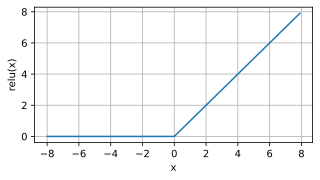

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

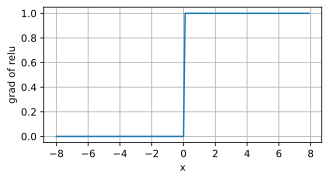

In [3]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

$$
\operatorname{sigmoid}(x)=\frac{1}{1+\exp (-x)}
$$

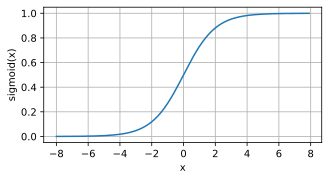

In [4]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

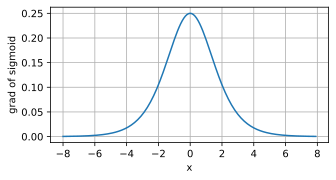

In [5]:
# Clear out previous gradients
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

$$
\tanh (x)=\frac{1-\exp (-2 x)}{1+\exp (-2 x)}
$$

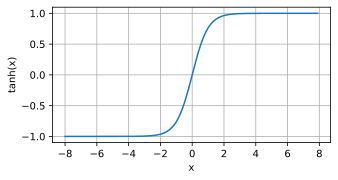

In [6]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

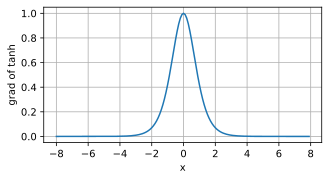

In [7]:
# Clear out previous gradients.
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

### Multi-hidden layers

$$
\begin{aligned}
\mathbf{h}_{1} &=\sigma\left(\mathbf{W}_{1} \mathbf{x}+\mathbf{b}_{1}\right) \\
\mathbf{h}_{2} &=\sigma\left(\mathbf{W}_{2} \mathbf{h}_{1}+\mathbf{b}_{2}\right) \\
\mathbf{h}_{3} &=\sigma\left(\mathbf{W}_{3} \mathbf{h}_{2}+\mathbf{b}_{3}\right) \\
\mathbf{o} &=\mathbf{W}_{4} \mathbf{h}_{3}+\mathbf{b}_{4}
\end{aligned}
$$


In [8]:
import torch
from torch import nn
from d2l import torch as d2l
import torchvision
from torch.utils import data
from torchvision import transforms

d2l.use_svg_display()

In [9]:
def get_dataloader_workers():
    return 8

def load_data_fashion_mnist(batch_size, resize=None):  #@save
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="./data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="./data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [10]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [11]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [12]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # Here '@' stands for matrix multiplication
    return (H@W2 + b2)

In [13]:
loss = nn.CrossEntropyLoss(reduction='none')

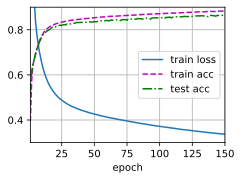

In [14]:
num_epochs, lr = 150, 0.01
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

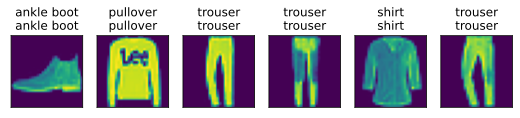

In [15]:
d2l.predict_ch3(net, test_iter)

In [16]:
import torch
from torch import nn
from d2l import torch as d2l

In [17]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

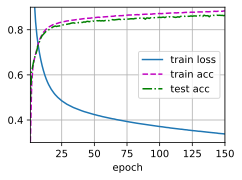

In [18]:
batch_size, lr, num_epochs = 256, 0.01, 150
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)